# Data Challenge 1

## Goal: This task requires that you create a model to predict cargo volume through San Francisco International Airport.

# Exploratory Data Analysis
## Goals:
    - Get a feel for the data
    - Remove any necessary data

In [418]:
import pandas as pd

df_train = pd.read_csv("cargo_train.csv")
df_train

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


In [419]:
# Checking for null values
df_train.isna().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    31
Published Airline               0
Published Airline IATA Code    31
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Metric TONS               0
dtype: int64

In [420]:
df_train = df_train.dropna()

In [421]:
df_train

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


# Above:
    - We removed null values 

# We need to see association between Operating Airline, Operating Airline IATA Code, Published Airline, and Published Airline IATA Code to see if we can delete columns to have a smaller dataframe

In [422]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(index=[df_train['Operating Airline'], df_train['Published Airline']],
                                columns=[df_train["Operating Airline IATA Code"], df_train["Published Airline IATA Code"]])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 2393512.0
P-value: 0.0


In [423]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(index=[df_train['Operating Airline IATA Code'], df_train['Published Airline']],
                                columns=[df_train["Operating Airline"], df_train["Published Airline IATA Code"]])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 2447910.0
P-value: 0.0


# Above
    - The columns have very strong assosciation due to a high chi-squared stat and a p-value of 0.0
    - Columns have strong assosciation is the p-value < 0.05
    - Thus we can use 1/4 of the columns and greatly shrink out dataframe when we need to 1 hot encode many columns later

# Below:
    - Operating Airline, Operating Airline IATA Code, Published Airline, and Published Airline IATA Code have very similar features and almost always matching
    - *Professor Brizan approved of this in office hours* I'm going to get rid of 3/4 the columns because they pretty much the mean the same
    - This will allow for our dataframe to not have so many features
    - Im going to keep the Operating Airline since it is actually the company flying the plane

In [424]:
cols_to_drop = ['Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code']
df_train = df_train.drop(cols_to_drop, axis=1)

In [425]:
df_train

,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,International,Canada,Deplaned,Cargo,Passenger,9.814090


# Above:
    - We removed 3 columns that could essentially be represented by a single column

# Need to 1 hot encode columns 1-6
    - We do this because columns 1-6 are strings and they need to be represented by int values

In [426]:
df_train.nunique()

Activity Period          186
Operating Airline         89
GEO Summary                2
GEO Region                 9
Activity Type Code         2
Cargo Type Code            3
Cargo Aircraft Type        3
Cargo Metric TONS      24872
dtype: int64

In [427]:
# PREP TEST DATA TO BE ONE HOT ENCODED
# preparing test + 1 hot encode
df_test = pd.read_csv("cargo_test.csv")

cols_to_drop = ['Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code']
df_test = df_test.drop(cols_to_drop, axis=1)
df_test

,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type
0,200907,United Airlines,Domestic,US,Deplaned,Mail,Passenger
1,202001,Nippon Cargo Airlines,International,Asia,Deplaned,Cargo,Freighter
2,201107,China Airlines,International,Asia,Enplaned,Cargo,Passenger
3,201809,China Airlines,International,Asia,Deplaned,Cargo,Passenger
4,200811,China Cargo Airlines,International,Asia,Enplaned,Cargo,Freighter
...,...,...,...,...,...,...,...
6802,201603,Air Canada,International,Canada,Enplaned,Mail,Passenger
6803,201910,British Airways,International,Europe,Enplaned,Cargo,Passenger
6804,201503,Air New Zealand,International,Australia / Oceania,Deplaned,Mail,Passenger
6805,201009,World Airways,Domestic,US,Enplaned,Cargo,Freighter


In [428]:
df_train

,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,International,Canada,Deplaned,Cargo,Passenger,9.814090


In [429]:
## encoder_X is this but metric cargo tons is dropped

In [430]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create an instance of the OneHotEncoder
encoder_train = OneHotEncoder(handle_unknown='ignore')

columns_to_encode = ['Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
                    'Cargo Type Code', 'Cargo Aircraft Type']

# Initialize an empty DataFrame to store the encoded data
encoded_df_train = pd.DataFrame()
encoded_df_test = pd.DataFrame()

# Create a list to store the columns to drop from the original DataFrame
columns_to_drop = []

encoder_y = df_train['Cargo Metric TONS']
encoder_X = df_train.drop(columns=['Cargo Metric TONS'])


# Loop through the columns to encode
for column_name in columns_to_encode:

    if column_name in encoder_X.columns:
        # column_to_encode = df_train[[column_name]]
        column_to_encode_train = encoder_X[[column_name]]
        column_to_encode_test = df_test[[column_name]]
        
        encoded_data_train = encoder_train.fit_transform(column_to_encode_train)
        encoded_data_test = encoder_train.transform(column_to_encode_test)
        
        
        # Convert to array and create a DataFrame
        encoded_column_df_train = pd.DataFrame(encoded_data_train.toarray())
        # Convert to array and create a DataFrame
        encoded_column_df_test = pd.DataFrame(encoded_data_test.toarray())

        
        # Add column names to the encoded DataFrame
        encoded_column_df_train.columns = encoder_train.get_feature_names_out(input_features=[column_name])
        encoded_column_df_test.columns = encoder_train.get_feature_names_out(input_features=[column_name])

        
        # Concatenate the encoded DataFrame with new columns
        encoded_df_train = pd.concat([encoded_df_train, encoded_column_df_train], axis=1)
        encoded_df_test = pd.concat([encoded_df_test, encoded_column_df_test], axis=1)

        
        # Add the column to the list of columns to drop from original dataframe
        columns_to_drop.append(column_name)
        
    else:
        # error checking
        print(f"Column '{column_name}' does not exist in the DataFrame.")

# Drop the original columns that were NOT one-hot encoded
# df_train = df_train.drop(columns=columns_to_drop)
encoder_X = encoder_X.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)


# Concatenate the original DataFrame with the one-hot encoded DataFrame
# combined_df = pd.concat([df_train, encoded_df_train], axis=1)
combined_df = pd.concat([encoder_X, encoded_df_train, encoder_y], axis=1)
combined_df_test = pd.concat([df_test, encoded_df_test], axis=1)

In [431]:
combined_df

,Activity Period,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,...,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,Cargo Metric TONS
0,201601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.871509
1,200811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,53.946194
2,200709.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.043999
3,201608.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.023530
4,201708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.951420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
23324,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
23636,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
23653,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN


In [432]:
combined_df_test

,Activity Period,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,200907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,201107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,201809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,200811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,201603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6803,201910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6804,201503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6805,201009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [433]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Create an instance of the OneHotEncoder
# encoder_train = OneHotEncoder(handle_unknown='ignore')

# columns_to_encode = ['Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
#                     'Cargo Type Code', 'Cargo Aircraft Type']

# # Initialize an empty DataFrame to store the encoded data
# encoded_df_train = pd.DataFrame()

# # Create a list to store the columns to drop from the original DataFrame
# columns_to_drop = []

# encoder_y = df_train['Cargo Metric TONS']
# encoder_X = df_train.drop(columns=['Cargo Metric TONS'])
# print(encoder_X.columns)

# # Loop through the columns to encode
# for column_name in columns_to_encode:

#     if column_name in encoder_X.columns:
#         print(column_name)
#         # Encode the column
#         # column_to_encode = df_train[[column_name]]
#         column_to_encode = encoder_X[[column_name]]
#         # encoded_data = encoder_train.fit_transform(column_to_encode)
#         encoded_data = encoder_train.fit_transform(column_to_encode)
        
#         # Convert to array and create a DataFrame
#         encoded_column_df = pd.DataFrame(encoded_data.toarray())
        
#         # Add column names to the encoded DataFrame
#         encoded_column_df.columns = encoder_train.get_feature_names_out(input_features=[column_name])
        
#         # Concatenate the encoded DataFrame with new columns
#         encoded_df_train = pd.concat([encoded_df_train, encoded_column_df], axis=1)
        
#         # Add the column to the list of columns to drop from original dataframe
#         columns_to_drop.append(column_name)
        
#     else:
#         # error checking
#         print(f"Column '{column_name}' does not exist in the DataFrame.")

# # Drop the original columns that were NOT one-hot encoded
# # df_train = df_train.drop(columns=columns_to_drop)
# encoder_X = encoder_X.drop(columns=columns_to_drop)

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# # combined_df = pd.concat([df_train, encoded_df_train], axis=1)
# combined_df = pd.concat([encoder_X, encoded_df_train], axis=1)





# #TEST DATA
# encoded_df_test = pd.DataFrame()

# # Create a list to store the columns to drop from the original DataFrame
# columns_to_drop = []

# print(df_test.columns)

# # Loop through the columns to encode
# for column_name in columns_to_encode:

#     # if the column name is in original dataframe
#     if column_name in df_test.columns:
#         print(column_name)
#         # Encode the column
#         column_to_encode = df_test[[column_name]]
#         encoded_data = encoder_train.transform(column_to_encode)

#         # Convert to array and create a DataFrame
#         encoded_column_df = pd.DataFrame(encoded_data.toarray())
        
#         # Add column names to the encoded DataFrame
#         encoded_column_df.columns = encoder_train.get_feature_names_out(input_features=[column_name])
        
#         # Concatenate the encoded DataFrame with new columns
#         encoded_df_test = pd.concat([encoded_df_test, encoded_column_df], axis=1)
        
#         # Add the column to the list of columns to drop from original dataframe
#         columns_to_drop.append(column_name)
        
#     else:
#         # error checking
#         print(f"Column '{column_name}' does not exist in the DataFrame.")

# # Drop the original columns that were NOT one-hot encoded
# df_test = df_test.drop(columns=columns_to_drop)

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# combined_df_test = pd.concat([df_test, encoded_df_test], axis=1)

In [434]:
combined_df.isna().sum()

Activity Period                   31
Operating Airline_ABX Air         31
Operating Airline_ATA Airlines    31
Operating Airline_Aer Lingus      31
Operating Airline_Aeromexico      31
                                  ..
Cargo Type Code_Mail              31
Cargo Aircraft Type_Combi         31
Cargo Aircraft Type_Freighter     31
Cargo Aircraft Type_Passenger     31
Cargo Metric TONS                 31
Length: 110, dtype: int64

In [ ]:
# # preparing test + 1 hot encode
# df_test = pd.read_csv("cargo_test.csv")

# cols_to_drop = ['Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code']
# df_test = df_test.drop(cols_to_drop, axis=1)

# # Create an instance of the OneHotEncoder
# #encoder_train = OneHotEncoder(handle_unknown='ignore')

# columns_to_encode = ['Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
#                     'Cargo Type Code', 'Cargo Aircraft Type']

# # Initialize an empty DataFrame to store the encoded data
# encoded_df_test = pd.DataFrame()

# # Create a list to store the columns to drop from the original DataFrame
# columns_to_drop = []

# # Loop through the columns to encode
# for column_name in columns_to_encode:

#     # if the column name is in original dataframe
#     if column_name in df_test.columns:
       
#         # Encode the column
#         column_to_encode = df_test[[column_name]]
#         encoded_data = encoder_train.transform(column_to_encode)

#         # Convert to array and create a DataFrame
#         encoded_column_df = pd.DataFrame(encoded_data.toarray())
        
#         # Add column names to the encoded DataFrame
#         encoded_column_df.columns = encoder_train.get_feature_names_out(input_features=[column_name])
        
#         # Concatenate the encoded DataFrame with new columns
#         encoded_df_test = pd.concat([encoded_df_test, encoded_column_df], axis=1)
        
#         # Add the column to the list of columns to drop from original dataframe
#         columns_to_drop.append(column_name)
        
#     else:
#         # error checking
#         print(f"Column '{column_name}' does not exist in the DataFrame.")

# # Drop the original columns that were NOT one-hot encoded
# df_test = df_test.drop(columns=columns_to_drop)

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# combined_df_test = pd.concat([df_test, encoded_df_test], axis=1)

In [435]:
combined_df.dropna(inplace=True)

In [436]:
combined_df.isna().sum()

Activity Period                   0
Operating Airline_ABX Air         0
Operating Airline_ATA Airlines    0
Operating Airline_Aer Lingus      0
Operating Airline_Aeromexico      0
                                 ..
Cargo Type Code_Mail              0
Cargo Aircraft Type_Combi         0
Cargo Aircraft Type_Freighter     0
Cargo Aircraft Type_Passenger     0
Cargo Metric TONS                 0
Length: 110, dtype: int64

In [437]:
combined_df_test.isna().sum()

Activity Period                   0
Operating Airline_ABX Air         0
Operating Airline_ATA Airlines    0
Operating Airline_Aer Lingus      0
Operating Airline_Aeromexico      0
                                 ..
Cargo Type Code_Express           0
Cargo Type Code_Mail              0
Cargo Aircraft Type_Combi         0
Cargo Aircraft Type_Freighter     0
Cargo Aircraft Type_Passenger     0
Length: 109, dtype: int64

# Below, Account for Activity Period: 
    - We want to seperate the Activity Period by month and year to account for any seasonal trends (reccomended by Professor Brizan)

# Above:
    - We have an updated dataframe that contains 1 hot encoded values
    - We can now do regression algos on this data since they are no longer strings/objects

In [438]:
import numpy as np

# Split my activity period to month and year to see better trends
combined_df['Year'] = combined_df['Activity Period'].astype(str).str[:4]
combined_df['Month'] = combined_df['Activity Period'].astype(str).str[4:]

# # Convert 'Month' to integer
combined_df['Month'] = combined_df['Month'].astype(float).round().astype(int)
combined_df['Year'] = combined_df['Year'].astype(int)


combined_df['Month_sin'] = np.sin(2 * np.pi * combined_df['Month'] / 12)
combined_df['Month_cos'] = np.cos(2 * np.pi * combined_df['Month'] / 12)
combined_df.drop('Activity Period', axis=1, inplace=True)
combined_df.drop('Month', axis=1, inplace=True)
combined_df

,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,Operating Airline_Air France,...,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,Cargo Metric TONS,Year,Month_sin,Month_cos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8.871509,2016,5.000000e-01,8.660254e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,53.946194,2008,-5.000000e-01,8.660254e-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.043999,2007,-1.000000e+00,-1.836970e-16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,19.023530,2016,-8.660254e-01,-5.000000e-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.951420,2017,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,39.472272,2013,-2.449294e-16,1.000000e+00
27195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.824102,2009,-1.000000e+00,-1.836970e-16
27196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,231.507461,2014,-5.000000e-01,-8.660254e-01
27197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,99.517572,2017,-1.000000e+00,-1.836970e-16


# NEED TO DO SAME EDA TO TEST DATA

# Above:
    - Everything above was done for our training data

# Below:
    - Since we also have test data, we have to do similar eda / feature engineering to our testing data
    - We want the same features in both (except our training data will for now have the target column)

# Test data

In [439]:
# # preparing test + 1 hot encode
# df_test = pd.read_csv("cargo_test.csv")

# cols_to_drop = ['Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code']
# df_test = df_test.drop(cols_to_drop, axis=1)

# # Create an instance of the OneHotEncoder
# #encoder_train = OneHotEncoder(handle_unknown='ignore')

# columns_to_encode = ['Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
#                     'Cargo Type Code', 'Cargo Aircraft Type']

# # Initialize an empty DataFrame to store the encoded data
# encoded_df_test = pd.DataFrame()

# # Create a list to store the columns to drop from the original DataFrame
# columns_to_drop = []

# # Loop through the columns to encode
# for column_name in columns_to_encode:

#     # if the column name is in original dataframe
#     if column_name in df_test.columns:
       
#         # Encode the column
#         column_to_encode = df_test[[column_name]]
#         #encoded_data = encoder_train.fit_transform(column_to_encode)
#         encoded_data = encoder_train.transform(column_to_encode)

#         # Convert to array and create a DataFrame
#         encoded_column_df = pd.DataFrame(encoded_data.toarray())
        
#         # Add column names to the encoded DataFrame
#         encoded_column_df.columns = encoder_train.get_feature_names_out(input_features=[column_name])
        
#         # Concatenate the encoded DataFrame with new columns
#         encoded_df_test = pd.concat([encoded_df_test, encoded_column_df], axis=1)
        
#         # Add the column to the list of columns to drop from original dataframe
#         columns_to_drop.append(column_name)
        
#     else:
#         # error checking
#         print(f"Column '{column_name}' does not exist in the DataFrame.")

# # Drop the original columns that were NOT one-hot encoded
# df_test = df_test.drop(columns=columns_to_drop)

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# combined_df_test = pd.concat([df_test, encoded_df_test], axis=1)

In [440]:
combined_df_test

,Activity Period,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,200907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,201107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,201809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,200811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,201603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6803,201910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6804,201503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6805,201009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


Also split the activity period

In [441]:
import numpy as np

# Split my activity period to month and year to see better trends
combined_df_test['Year'] = combined_df_test['Activity Period'].astype(str).str[:4]
combined_df_test['Month'] = combined_df_test['Activity Period'].astype(str).str[4:]

# # Convert 'Month' to integer
combined_df_test['Month'] = combined_df_test['Month'].astype(float).round().astype(int)
combined_df_test['Year'] = combined_df_test['Year'].astype(int)


combined_df_test['Month_sin'] = np.sin(2 * np.pi * combined_df_test['Month'] / 12)
combined_df_test['Month_cos'] = np.cos(2 * np.pi * combined_df_test['Month'] / 12)
combined_df_test.drop('Activity Period', axis=1, inplace=True)
combined_df_test.drop('Month', axis=1, inplace=True)
combined_df_test

,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,Operating Airline_Air France,...,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,Year,Month_sin,Month_cos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2009,-5.000000e-01,-8.660254e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020,5.000000e-01,8.660254e-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2011,-5.000000e-01,-8.660254e-01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2018,-1.000000e+00,-1.836970e-16
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2008,-5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2016,1.000000e+00,6.123234e-17
6803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2019,-8.660254e-01,5.000000e-01
6804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2015,1.000000e+00,6.123234e-17
6805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2010,-1.000000e+00,-1.836970e-16


# Need columns to match in both train and test datasets
    - Let's identify what columns are unique in both, we will need to remove them
    - We have some unique columns because our training set and test set have different data

In [442]:
# Make the features the same
# Get the list of features (columns) in each DataFrame
features_train = set(combined_df.columns)
features_test = set(combined_df_test.columns)

# Compare the features between the two DataFrames
unique_features_train = features_train.difference(features_test)
unique_features_test = features_test.difference(features_train)

# Print the results
print("\nFeatures Unique to train:")
print(unique_features_train)
print("\nFeatures Unique to test:")
print(unique_features_test)


Features Unique to train:
{'Cargo Metric TONS'}

Features Unique to test:
set()


## Remove non matching columns/features

In [443]:
combined_df

,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,Operating Airline_Air France,...,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,Cargo Metric TONS,Year,Month_sin,Month_cos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8.871509,2016,5.000000e-01,8.660254e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,53.946194,2008,-5.000000e-01,8.660254e-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.043999,2007,-1.000000e+00,-1.836970e-16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,19.023530,2016,-8.660254e-01,-5.000000e-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.951420,2017,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,39.472272,2013,-2.449294e-16,1.000000e+00
27195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.824102,2009,-1.000000e+00,-1.836970e-16
27196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,231.507461,2014,-5.000000e-01,-8.660254e-01
27197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,99.517572,2017,-1.000000e+00,-1.836970e-16


In [444]:
# # Drop from train set
# columns_to_delete = [
#     'Operating Airline_Air Italy S.P.A',  
#     'Operating Airline_Virgin America', 
#     'Operating Airline_Air Canada Jazz', 
#     'Operating Airline_Mesa Airlines'
# ]
# combined_df = combined_df.drop(columns=columns_to_delete)
# combined_df

In [445]:
# # Drop from test set
# columns_to_delete = [
#     'Operating Airline_Atlantic Southeast Airlines', 
#     'Operating Airline_Total Airport Services, Inc. (Inactive)', 
#     'Operating Airline_ASTAR USA, LLC', 
#     'Operating Airline_Swissport USA', 
#     'Operating Airline_E.A.G.L.E.', 
#     'Operating Airline_Air Transport International, LLC.'
# ]

# combined_df_test = combined_df_test.drop(columns=columns_to_delete)
# combined_df_test

Above:
    - We now have the same feature/columns for the train and test data (except test data doesnt contain target feature)

# Find out which algorithm is best
    - We are going to use MSE to compare our models
    - Need to find baseline MSE 
    - Going to try different regressor algos and plot them

# Baseline model for MSE to compare to other algorithms

In [446]:
# GET A BASELINE MODEL FOR MSE
from sklearn.metrics import mean_squared_error
import math

# Calculate the mean of the target column (constant prediction)
baseline_prediction = combined_df['Cargo Metric TONS'].mean()

# Create an array of constant predictions
baseline_predictions = [baseline_prediction] * len(combined_df)

# Calculate the MSE for the baseline model
baseline_mse = mean_squared_error(combined_df['Cargo Metric TONS'], baseline_predictions)

print("Baseline MSE: ", baseline_mse)
print("Baseline RMSE: ", math.sqrt(baseline_mse))

Baseline MSE:  187536.0755384708
Baseline RMSE:  433.05435633240177


# We will now test different regression algos and compare it to our baseline MSE and RMSE. If the algo that we are testing has a lower MSE/RMSE than our baseline metrics, then we are in good shape. We will choose the algo with MSE/RMSE closest to 0

# Linear Regression
    - Good first regression model to start off with
    - Continous and supervised

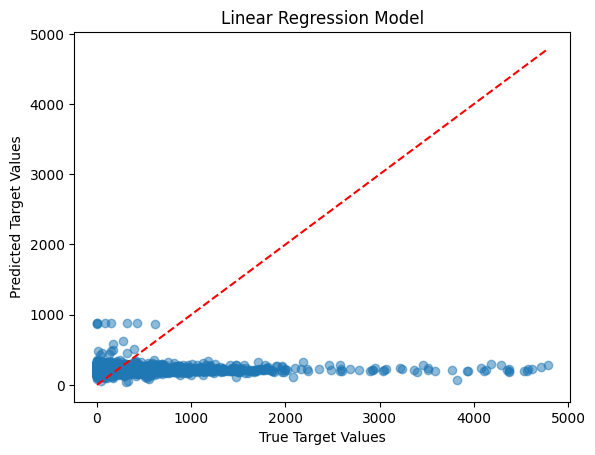

Linear MSE:  188062.68993836164
Linear RMSE:  433.66195352873837


In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math

Y = combined_df['Cargo Metric TONS']
X = combined_df.drop(columns=['Cargo Metric TONS'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

linear_mse = mean_squared_error(Y_test, Y_pred)


# Plot it
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("True Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Linear Regression Model")

# Add the regression line
line_x = np.linspace(min(Y_test), max(Y_test), 100)
line_y = line_x  # Assuming a simple y = x line
plt.plot(line_x, line_y, color='red', linestyle='--', label='Regression Line')

plt.show()

print("Linear MSE: ", linear_mse)
print("Linear RMSE: ", math.sqrt(linear_mse))

In [448]:
# Original before 
# Linear MSE:  104332.98672163964
# Linear RMSE:  323.0061713367713

# Random Forest

In [449]:
combined_df

,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air Cargo Carriers,Operating Airline_Air China,Operating Airline_Air France,...,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,Cargo Metric TONS,Year,Month_sin,Month_cos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8.871509,2016,5.000000e-01,8.660254e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,53.946194,2008,-5.000000e-01,8.660254e-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.043999,2007,-1.000000e+00,-1.836970e-16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,19.023530,2016,-8.660254e-01,-5.000000e-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.951420,2017,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,39.472272,2013,-2.449294e-16,1.000000e+00
27195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.824102,2009,-1.000000e+00,-1.836970e-16
27196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,231.507461,2014,-5.000000e-01,-8.660254e-01
27197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,99.517572,2017,-1.000000e+00,-1.836970e-16


In [450]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

# Assuming you have a DataFrame 'combined_df' with your data
X = combined_df.drop(columns=['Cargo Metric TONS'])  # Features
y = combined_df['Cargo Metric TONS']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of cross-validation folds
folds = 5

# Define a dictionary of hyperparameters to search
params = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [30, 40, 50, 60, 70]
}

# Create a GridSearchCV object for hyperparameter tuning
rf = RandomForestRegressor()
clf_rf = GridSearchCV(rf, params, cv=folds, scoring='neg_mean_squared_error')

# Fit the model with training data
clf_rf.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_hyperparameters = clf_rf.best_params_

# Create a Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=best_hyperparameters['max_depth'], n_estimators=best_hyperparameters['n_estimators'])

# Fit the model with training data using the best hyperparameters
best_rf.fit(X_train, y_train)

# Make predictions on the training data
y_pred = best_rf.predict(X_test)

# Calculate the training set MSE
rf_mse_train = mean_squared_error(y_test, y_pred)

In [452]:
print("Random Forest MSE:", rf_mse_train)
print("Random Forest RMSE:", math.sqrt(rf_mse_train))

Random Forest MSE: 187774.77476320713
Random Forest RMSE: 433.3298683026675


In [453]:
# Used to be:
# Random Forest MSE: 28369.585867322217
# Random Forest RMSE: 168.43273395430657

# LASSO
    - It is good at improving model accuracy through regularization/penalization

In [454]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Define the number of cross-validation folds
folds = 5

# Define a dictionary of hyperparameters to search
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # L1 regularization strength
}

# Create a Lasso Regressor
lasso = Lasso(max_iter=20000)  # Increase max_iter


# Create a GridSearchCV object for hyperparameter tuning
clf_lasso = GridSearchCV(lasso, params, cv=folds, scoring='neg_mean_squared_error')

# Define training data
X_train = combined_df.drop(columns=['Cargo Metric TONS'])
y_train = combined_df['Cargo Metric TONS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with training data
clf_lasso.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_hyperparameters = clf_lasso.best_params_

# Create a Lasso Regressor with the best hyperparameters
best_lasso = Lasso(alpha=best_hyperparameters['alpha'])

# Fit the model with training data using the best hyperparameters
best_lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_lasso.predict(X_test)

In [456]:
lasso_mse_train = mean_squared_error(y_test, y_pred)
print("Lasso MSE:", lasso_mse_train)
print("Lasso RMSE:", math.sqrt(lasso_mse_train))

Lasso MSE: 187115.343367179
Lasso RMSE: 432.56831063680454


In [457]:
# Used to be:
# Lasso MSE: 104328.933461939
# Lasso RMSE: 322.99989699988913

# Ridge
    - Similar to Lasso
    - It is good at improving model accuracy through regularization/penalization

In [458]:
from sklearn.linear_model import Ridge

# Define the number of cross-validation folds
folds = 5

# Define a dictionary of hyperparameters to search
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # L2 regularization strength
}

# Create a Ridge Regressor
ridge = Ridge()

# Create a GridSearchCV object for hyperparameter tuning
clf_ridge = GridSearchCV(ridge, params, cv=folds, scoring='neg_mean_squared_error')

# Define training data
X_train = combined_df.drop(columns=['Cargo Metric TONS'])
y_train = combined_df['Cargo Metric TONS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with training data
clf_ridge.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_hyperparameters = clf_ridge.best_params_
best_alpha = best_hyperparameters['alpha']  # Extract the best alpha value

# Create a Ridge Regressor with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha)

# Fit the model with training data using the best hyperparameters
best_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ridge.predict(X_test)

In [460]:
ridge_mse_train = mean_squared_error(y_test, y_pred)
print("Ridge MSE:", ridge_mse_train)
print("Ridge RMSE:", math.sqrt(ridge_mse_train))

Ridge MSE: 186945.56887628883
Ridge RMSE: 432.3720260103431


In [461]:
# Used to be:
# Ridge MSE: 104300.92978392607
# Ridge RMSE: 322.9565447299777

# kNN
    - Algo that isn't sensitive to outliers
    - May produce better MSE/RMSE

In [462]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


# Define the number of cross-validation folds
folds = 5

# Define a dictionary of hyperparameters to search
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()

# Create a GridSearchCV object for hyperparameter tuning
clf_knn = GridSearchCV(knn, params, cv=folds, scoring='neg_mean_squared_error')

# Define training data
X_train = combined_df.drop(columns=['Cargo Metric TONS'])
y_train = combined_df['Cargo Metric TONS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with training data
clf_knn.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_hyperparameters = clf_knn.best_params_

# Create a K-Nearest Neighbors Regressor with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_hyperparameters['n_neighbors'], 
                              weights=best_hyperparameters['weights'], 
                              p=best_hyperparameters['p'])

# Fit the model with training data using the best hyperparameters
best_knn.fit(X_train, y_train)

# Make predictions on the training data
y_pred = best_knn.predict(X_test)

# calculate mse
knn_mse_train = mean_squared_error(y_test, y_pred)

In [463]:
print("kNN MSE:", knn_mse_train)
print("kNN RMSE:", math.sqrt(knn_mse_train))

kNN MSE: 208336.6374022721
kNN RMSE: 456.43908399946656


In [ ]:
# Used to be:
# kNN MSE: 22493.162270830544
# kNN RMSE: 149.97720583752235

# OVERALL: kNN is the best model for this dataset
    - Random forest algo was also very close to being the best by having an MSE=28369.6 and RMSE=168.4
    - But kNN beats RF at MSE=22493.2 and RMSE=150.0
    - kNN has the smallest MSE and closest to 0. It is the best model for this data set and performs far better than ridge, lasso, and linear regression
    - output to csv file below

In [190]:
# Predicted target values for test set
# cleaned test dataset from earlier
X = combined_df_test

# where I save target column values
y_target_col= best_knn.predict(X)

# create df
y_target_col_df = pd.DataFrame({'Predicted Cargo Metric TONS': y_target_col})

y_target_col_df

# set csv file
y_target_col_df.to_csv('data_challene_1_predictions.csv')